# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [21]:
import pandas as pd
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins = pd.get_dummies(penguins, columns=['species', 'island', 'sex'], drop_first=True)
print(penguins.head())
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc


   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  year  \
0            39.1           18.7              181.0       3750.0  2007   
1            39.5           17.4              186.0       3800.0  2007   
2            40.3           18.0              195.0       3250.0  2007   
3             NaN            NaN                NaN          NaN  2007   
4            36.7           19.3              193.0       3450.0  2007   

   species_Chinstrap  species_Gentoo  island_Dream  island_Torgersen  sex_male  
0              False           False         False              True      True  
1              False           False         False              True     False  
2              False           False         False              True     False  
3              False           False         False              True     False  
4              False           False         False              True     False  


Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [16]:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
penguins = penguins.dropna()
import matplotlib.pyplot as plt

X = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'island_Dream', 'island_Torgersen', 'sex_male']]
y = penguins[['species_Chinstrap', 'species_Gentoo']] # Target variables are species_Chinstrap and species_Gentoo since we used drop_first=True when creating dummy variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=pd.DataFrame(y).idxmax(axis=1))


knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(X_train, y_train)

knn2 = KNeighborsClassifier(n_neighbors=10)
knn2.fit(X_train, y_train)


dt1 = DecisionTreeClassifier(max_depth=3, random_state=42)
dt1.fit(X_train, y_train)

dt2 = DecisionTreeClassifier(max_depth=5, random_state=42)
dt2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [22]:
models = {
    "kNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "kNN (k=10)": KNeighborsClassifier(n_neighbors=10),
    "Decision Tree (depth=3)": DecisionTreeClassifier(max_depth=3, random_state=42),
    "Decision Tree (depth=5)": DecisionTreeClassifier(max_depth=5, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print("Confusion Matrix:\n", confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1)))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=['Chinstrap', 'Gentoo']))



--- kNN (k=5) ---
Confusion Matrix:
 [[61  5]
 [ 4 33]]
Accuracy: 0.7572815533980582
              precision    recall  f1-score   support

   Chinstrap       0.80      0.33      0.47        24
      Gentoo       0.87      0.89      0.88        37

   micro avg       0.85      0.67      0.75        61
   macro avg       0.83      0.61      0.68        61
weighted avg       0.84      0.67      0.72        61
 samples avg       0.40      0.40      0.40        61

--- kNN (k=10) ---
Confusion Matrix:
 [[63  3]
 [ 6 31]]
Accuracy: 0.7281553398058253
              precision    recall  f1-score   support

   Chinstrap       1.00      0.17      0.29        24
      Gentoo       0.91      0.84      0.87        37

   micro avg       0.92      0.57      0.71        61
   macro avg       0.96      0.50      0.58        61
weighted avg       0.95      0.57      0.64        61
 samples avg       0.34      0.34      0.34        61

--- Decision Tree (depth=3) ---
Confusion Matrix:
 [[66  0]
 [ 1 36

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

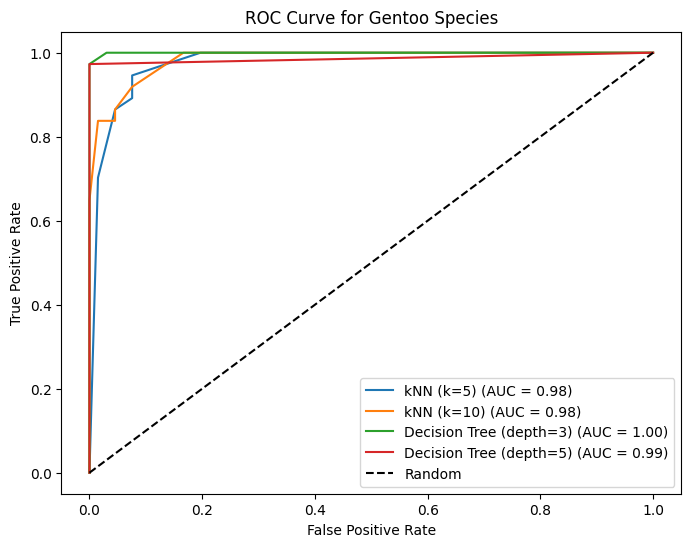

In [20]:
roc_data = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_probs = model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test['species_Gentoo'], y_probs[1][:, 1])
    roc_data[name] = (fpr, tpr, auc(fpr, tpr))


plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc_score) in roc_data.items():
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gentoo Species')
plt.legend(loc='lower right')
plt.show()